In [96]:
import pandas as pd
df = pd.read_csv("EV_Stations_data.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Station Name              385 non-null    object
 1   Street Address            385 non-null    object
 2   City                      385 non-null    object
 3   Access Days Time          385 non-null    object
 4   EV Level1 EVSE Num        385 non-null    object
 5   EV Level2 EVSE Num        385 non-null    object
 6   EV DC Fast Count          385 non-null    object
 7   EV Other Info             385 non-null    object
 8   New Georeferenced Column  385 non-null    object
dtypes: object(9)
memory usage: 27.2+ KB
None


# Overview

The EV_Stations_data.csv file contains data about Electric Vehicle (EV) charging stations, including their names, addresses, cities, access times, the number of different types of EVSE (Electric Vehicle Supply Equipment), and additional information. The data is structured in a tabular format with each row representing an EV charging station. There are 9 columns with object data types that shows that there is a need of preprocessing

In [97]:

# Identify missing values

missing_values = df.isnull().sum()
total_values = df.shape[0]
missing_percentage = (missing_values / total_values) * 100

missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
print(missing_info)

                          Missing Values  Percentage
Station Name                           0         0.0
Street Address                         0         0.0
City                                   0         0.0
Access Days Time                       0         0.0
EV Level1 EVSE Num                     0         0.0
EV Level2 EVSE Num                     0         0.0
EV DC Fast Count                       0         0.0
EV Other Info                          0         0.0
New Georeferenced Column               0         0.0


# Missing Values Summary
There are no missing values in any of the columns of the dataset.
This indicates that the data is complete and no imputation or data cleaning related to missing values is required.

In [98]:
# Explore data set and identifying potential features
print(df.info())
print(df.describe().to_string())
print(df.head(5).to_string()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Station Name              385 non-null    object
 1   Street Address            385 non-null    object
 2   City                      385 non-null    object
 3   Access Days Time          385 non-null    object
 4   EV Level1 EVSE Num        385 non-null    object
 5   EV Level2 EVSE Num        385 non-null    object
 6   EV DC Fast Count          385 non-null    object
 7   EV Other Info             385 non-null    object
 8   New Georeferenced Column  385 non-null    object
dtypes: object(9)
memory usage: 27.2+ KB
None
                                Station Name Street Address      City Access Days Time EV Level1 EVSE Num EV Level2 EVSE Num EV DC Fast Count EV Other Info      New Georeferenced Column
count                                    385            385       385 

In [99]:
# Rename the columns
def col_rename(df):
  # Using list comprehension to create a new column list with replaced names
  df.columns = [col.replace(' ', '_') for col in df.columns]
  return df
df = col_rename(df)

print(df.columns)
#df.head()

Index(['Station_Name', 'Street_Address', 'City', 'Access_Days_Time',
       'EV_Level1_EVSE_Num', 'EV_Level2_EVSE_Num', 'EV_DC_Fast_Count',
       'EV_Other_Info', 'New_Georeferenced_Column'],
      dtype='object')


# Renaming Columns
The column names in the dataset were modified to replace spaces with underscores for easier manipulation and reference in the code.
These changes improve the readability and usability of the DataFrame, making it more convenient for further data processing tasks.

In [100]:
#Checking for duplicates 
data=pd.DataFrame(df)
duplicates = data.duplicated(keep=False)

# print the duplicate rows
print(data[duplicates])

Empty DataFrame
Columns: [Station_Name, Street_Address, City, Access_Days_Time, EV_Level1_EVSE_Num, EV_Level2_EVSE_Num, EV_DC_Fast_Count, EV_Other_Info, New_Georeferenced_Column]
Index: []


# Checking for Duplicates
The dataset was checked for duplicate rows, and it was found that there are no duplicates. This ensures the integrity of the data and confirms that each entry is unique.

In [101]:
#print the dataset
df.head()
#The modified dataset with renamed columns is now ready for further exploration and analysis.


,Station_Name,Street_Address,City,Access_Days_Time,EV_Level1_EVSE_Num,EV_Level2_EVSE_Num,EV_DC_Fast_Count,EV_Other_Info,New_Georeferenced_Column
0,BMW OF DARIEN,138-142 Ledge Rd,Darien,24 hours daily,NONE,2,NONE,NONE,POINT (-73.4764687 41.072882)
1,Dunkin’ - Tesla Supercharger,893 E Main St,Meriden,24 hours daily; for Tesla use only,NONE,NONE,8,NONE,POINT (-72.773473 41.527367)
2,Town of Beacon Falls - Commuter Lot,105 N Main St,Beacon Falls,24 hours daily,NONE,1,NONE,NONE,POINT (-73.065583 41.44548100000001)
3,OLD SAYBROOK VW,319 Middlesex Turnpike,Old Saybrook,24 hours daily,NONE,2,NONE,NONE,POINT (-72.3825 41.3102778)
4,Fairfield Rail Station,80 Mill Plain Rd,Fairfield,24 hours daily,NONE,2,NONE,NONE,POINT (-73.264511 41.143125)


In [102]:
#Replacing the NONE value with the 0
# changing values 'NONE' in columns to be represented by 0
df['EV_Level1_EVSE_Num'] = df['EV_Level1_EVSE_Num'].replace('NONE', 0)
df['EV_Level2_EVSE_Num'] = df['EV_Level2_EVSE_Num'].replace('NONE', 0)
df['EV_DC_Fast_Count'] = df['EV_DC_Fast_Count'].replace('NONE', 0)
print(df.head(4).to_string())


# changing datatype from object to integers

try:
  for col in ['EV_Level1_EVSE_Num', 'EV_Level2_EVSE_Num', 'EV_DC_Fast_Count']:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Handle conversion errors
except:
  pass 

print(df.info())

                          Station_Name          Street_Address          City                    Access_Days_Time EV_Level1_EVSE_Num EV_Level2_EVSE_Num EV_DC_Fast_Count EV_Other_Info              New_Georeferenced_Column
0                        BMW OF DARIEN        138-142 Ledge Rd        Darien                      24 hours daily                  0                  2                0          NONE         POINT (-73.4764687 41.072882)
1         Dunkin’ - Tesla Supercharger           893 E Main St       Meriden  24 hours daily; for Tesla use only                  0                  0                8          NONE          POINT (-72.773473 41.527367)
2  Town of Beacon Falls - Commuter Lot           105 N Main St  Beacon Falls                      24 hours daily                  0                  1                0          NONE  POINT (-73.065583 41.44548100000001)
3                      OLD SAYBROOK VW  319 Middlesex Turnpike  Old Saybrook                      24 hours daily        

# Replacing 'NONE' with 0 and Changing Data Types in the Dataset
The dataset has been successfully cleaned, with 'NONE' values replaced by 0 and relevant columns converted to integer types. This preprocessing step is crucial for ensuring the data is ready for further analysis and visualization.

In [103]:
#Calculate Summary Statistics
print(df.describe())

       EV_Level1_EVSE_Num  EV_Level2_EVSE_Num  EV_DC_Fast_Count
count          385.000000          385.000000        385.000000
mean             0.054545            2.036364          0.597403
std              0.489085            1.845244          2.131484
min              0.000000            0.000000          0.000000
25%              0.000000            1.000000          0.000000
50%              0.000000            2.000000          0.000000
75%              0.000000            2.000000          0.000000
max              8.000000           17.000000         16.000000


# Summary Statistics of the EV Stations Dataset
The descriptive statistics indicate that most EV stations have no Level 1 EVSE units or DC fast chargers, while Level 2 EVSE units are more common.
The dataset is now clean and ready for further analysis, and these summary statistics provide a useful overview of the distribution of EVSE units across the stations.

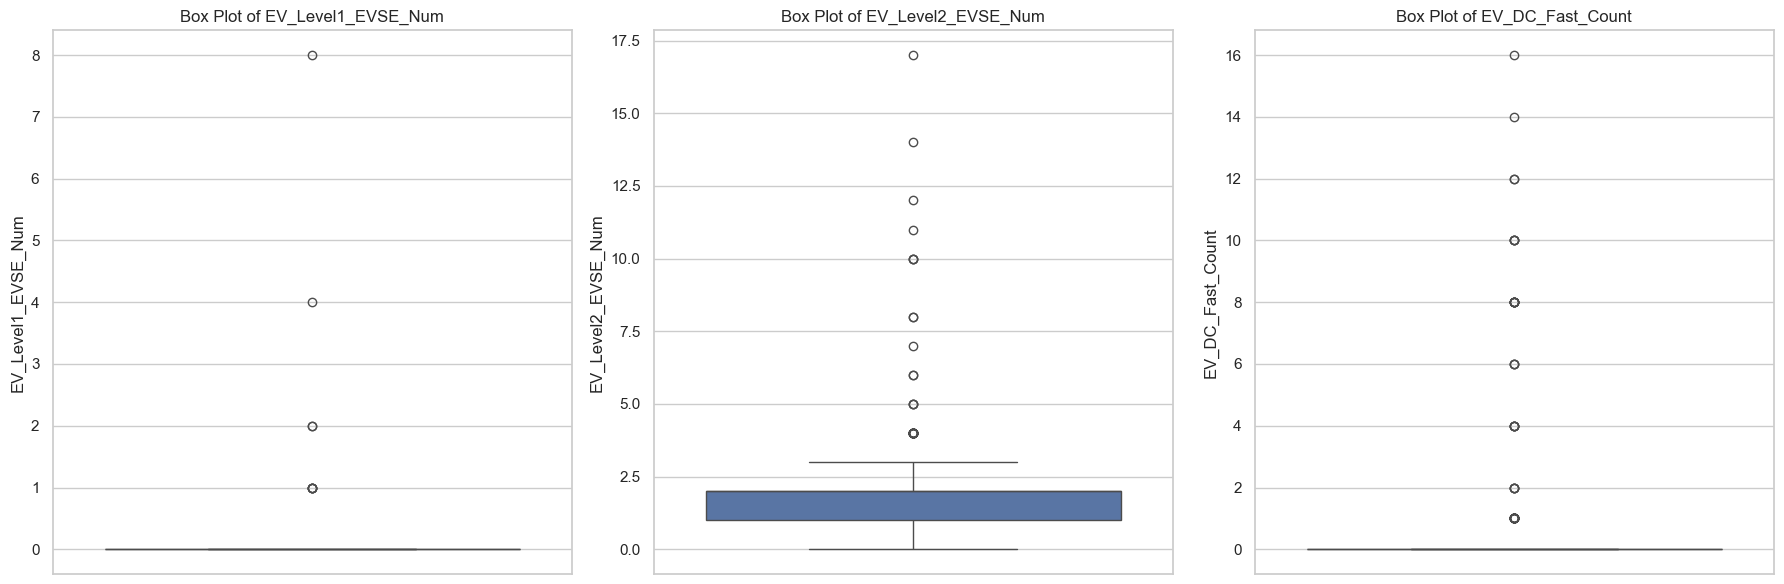

In [104]:
#Box Plots: Unveil statistical summaries such as median, quartiles, and outliers, aiding in data distribution analysis.
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# List of columns to create box plots for
columns = ['EV_Level1_EVSE_Num', 'EV_Level2_EVSE_Num', 'EV_DC_Fast_Count']

# Iterate over the columns and create a box plot for each
for i, col in enumerate(columns):
    sns.boxplot(y=df[col], ax= axs[i])
    axs[i].set_title(f'Box Plot of {col}')
    axs[i].set_ylabel(col)

# Display the plots
plt.tight_layout()
plt.show()

# Interpretation of Box Plots
The box plots highlight the presence of many stations with 0 Level 1 and DC Fast Chargers, indicating a potential gap in slower and fast charging infrastructure. The outliers, especially for Level 2 chargers, suggest that while some stations are well-equipped, the distribution is uneven. This analysis can help in identifying areas where additional charging infrastructure is needed and understanding the current distribution of EV charging stations.

In [105]:
# Group the rows by 'Access_Days_Time' and display the groups
grouped_df = df.groupby('Access_Days_Time')

# Display each group
# for name, group in grouped_df:
#     print(f'\nAccess Days Time: {name}')
#     group.head(10)

In [106]:
# Group the rows by 'Access_Days_Time' and count the number of elements in each group
group_counts = df.groupby('Access_Days_Time').size().reset_index(name='Count')

# Display the counts
# print(group_counts.to_string())

In [107]:
# Assuming you have your data in a DataFrame already

grouped = pd.DataFrame(group_counts)

# Standardize the text to lowercase to handle inconsistencies
grouped['Access_Days_Time'] = grouped['Access_Days_Time'].str.lower()

# Extract common patterns and create new categories
# For example, we can identify different access categories
def categorize_access_days_time(text):
    if 'tesla' in text:
        return 'Tesla'
    elif 'daily' in text or '24 hours' in text:
        return 'Daily'
    elif 'business hours' in text:
        return 'Business Hours'
    elif 'pay lot' in text:
        return 'Pay Lot'
    else:
        return 'Other'

grouped['Category'] = grouped['Access_Days_Time'].apply(categorize_access_days_time)

# Group by the new category and count the occurrences
category_counts = grouped.groupby('Category').sum().reset_index()


# Display the counts
print(category_counts.to_string())

         Category                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Access_Da

# Feature scaling
The data categorizes the "Access_Days_Time" column from the EV charging station dataset into various categories along with their respective counts.
Business Hours 
 includes 42 entries with subcategories such as dealership, garage, lot, park, and store business hours, specifying usage and restrictions for each. 
Daily access times, 
 the largest category with 289 entries, include various daily schedules like 24 hours daily, specific time frames, and special conditions or restrictions for customers, members, or guests. 
The Other category,
  with 27 entries, encompasses varied access times that don't fit the standard daily or business hours, including specific weekly schedules, seasonal variations, and other conditions like school or parking lot hours.
Pay Lot, 
 a smaller category with 5 entries, includes access times for pay lots restricted to garage hours. 
Tesla
 Finally, the Tesla category, with 22 entries, specifies stations available 24 hours daily exclusively for Tesla users. This categorization provides a comprehensive overview of the accessibility of EV charging stations based on different access restrictions and availability.

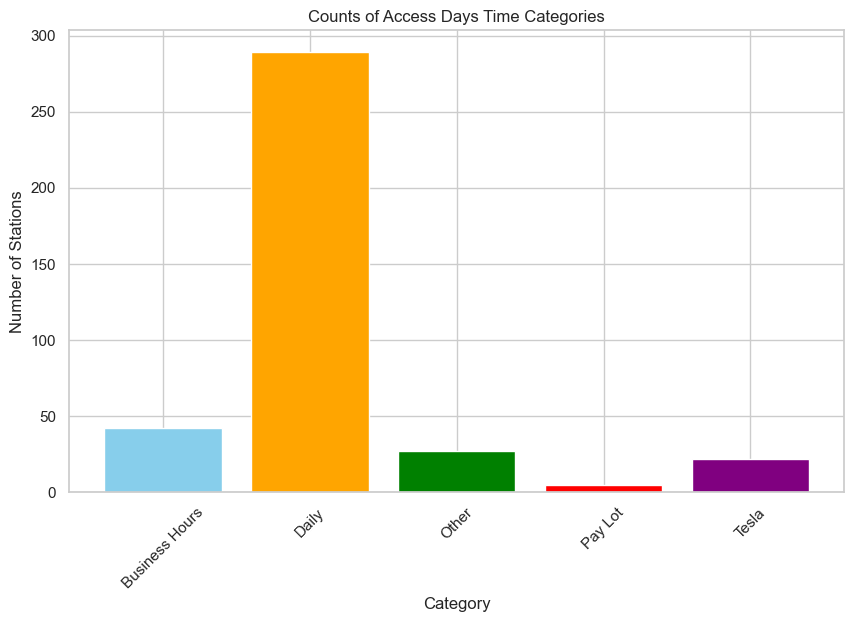

In [108]:
import matplotlib.pyplot as plt

# Define a list of colors for the bars
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'brown']


# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(category_counts['Category'], category_counts['Count'], color=colors[:len(category_counts)])
plt.xlabel('Category')
plt.ylabel('Number of Stations')
plt.title('Counts of Access Days Time Categories')
plt.xticks(rotation=45)
plt.show()

# Bar Chart: Counts of Access Days Time Categories
The bar chart visualizes the number of EV charging stations categorized by their access days and times. This helps in understanding how the availability of EV charging stations is distributed across different time categories. ie
Business Hours: A relatively small number of stations (around 50) are available only during business hours. These might be located at workplaces or businesses that operate within standard working hours.
Daily: The majority of the stations (around 280) fall under this category, indicating that most stations offer daily access, which might include 24-hour availability. This is beneficial for EV users who need charging facilities at any time.
Other: A smaller portion of the stations (around 30) have varied access times, which might be less predictable for users.
Pay Lot: Very few stations (around 5) are located in pay-to-use parking lots, suggesting that pay-to-use access is not a common practice among the EV stations in this dataset.
Tesla: A moderate number of stations (around 20) are dedicated to Tesla vehicles, reflecting Tesla’s strategy of building a proprietary charging network.

The bar chart provides a clear visual representation of the distribution of EV charging stations based on their access times. The dominance of daily access stations is evident, indicating a user-friendly charging infrastructure that accommodates flexible and continuous usage. This insight can guide future infrastructure development to ensure that EV charging is accessible and convenient for all users.

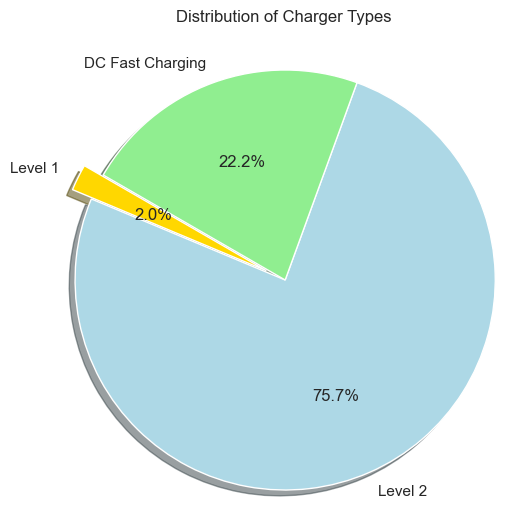

In [109]:

# Piechart representing the total distribution of charger types.

import pandas as pd
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import seaborn as sns


# Charging Level Distribution 
level1_count = df['EV_Level1_EVSE_Num'].sum()
level2_count = df['EV_Level2_EVSE_Num'].sum()
dc_fast_count = df['EV_DC_Fast_Count'].sum()

counts = [level1_count, level2_count, dc_fast_count]
labels = ['Level 1', 'Level 2', 'DC Fast Charging']
colors = ['gold', 'lightblue', 'lightgreen']
explode = (0.1, 0, 0)

# Create a pie chart 
plt.figure(figsize=(6, 6))  
plt.pie(counts, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=150)  


plt.title('Distribution of Charger Types', pad=20)
plt.axis('equal') 
plt.show()

# Distribution of Charger Types
The pie chart shows the distribution of different types of EV chargers:

Level 1 Chargers: Basic chargers, typically used at home or in places where vehicles are parked for long periods.

Level 2 Chargers: Faster chargers, commonly found in public places such as shopping centers, workplaces, and parking garages.

DC Fast Chargers: High-speed chargers, suitable for quick charging at locations for example highway rest stops and commercial charging stations.

         Category  EV_Level1_EVSE_Num  EV_Level2_EVSE_Num  EV_DC_Fast_Count
0  Business Hours                   0                  63                10
1           Daily                  13                 616                43
2           Other                   0                  74                 0
3         Pay Lot                   8                  31                 1
4           Tesla                   0                   0               176


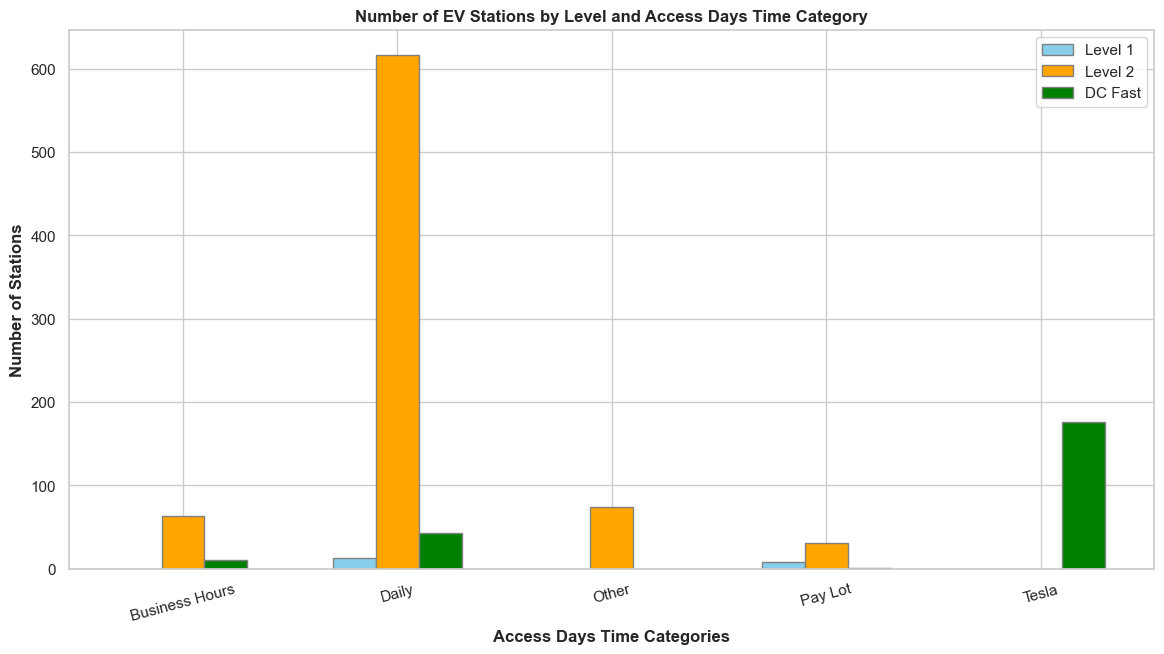

In [110]:

import numpy as np
df['Access_Days_Time'] = df['Access_Days_Time'].str.lower()

df['Category'] = df['Access_Days_Time'].apply(categorize_access_days_time)

# Group by the new category and sum the occurrences
category_counts = df.groupby('Category')[['EV_Level1_EVSE_Num', 'EV_Level2_EVSE_Num', 'EV_DC_Fast_Count']].sum().reset_index()

# Display the counts
print(category_counts)

# Define categories and levels
categories = category_counts['Category']
levels = ['EV_Level1_EVSE_Num', 'EV_Level2_EVSE_Num', 'EV_DC_Fast_Count']

# Define bar width and positions
bar_width = 0.2
r1 = np.arange(len(categories))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the plot
plt.figure(figsize=(14, 7))

# Plotting each level
plt.bar(r1, category_counts['EV_Level1_EVSE_Num'], color='skyblue', width=bar_width, edgecolor='grey', label='Level 1')
plt.bar(r2, category_counts['EV_Level2_EVSE_Num'], color='orange', width=bar_width, edgecolor='grey', label='Level 2')
plt.bar(r3, category_counts['EV_DC_Fast_Count'], color='green', width=bar_width, edgecolor='grey', label='DC Fast')

# Adding labels and title
plt.xlabel('Access Days Time Categories', fontweight='bold')
plt.ylabel('Number of Stations', fontweight='bold')
plt.title('Number of EV Stations by Level and Access Days Time Category', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(categories))], categories, rotation=15)
plt.legend()

# Show the plot
plt.show()

# Number of EV Stations by Level and Access Days Time Category
The bar chart above illustrates the distribution of electric vehicle (EV) stations categorized by the type of charger (Level 1, Level 2, DC Fast) and access days time categories. The access days time categories are classified as Business Hours, Daily, Other, Pay Lot, and Tesla.
Key Insights
Daily Access: The majority of EV stations fall under the 'Daily' access category, with a substantial number of Level 2 chargers (over 600) and a notable presence of DC Fast chargers.
Business Hours: EV stations available during business hours predominantly feature Level 2 chargers, followed by a smaller number of DC Fast and Level 1 chargers.
Tesla Stations: Tesla chargers are predominantly DC Fast chargers, with no significant presence of Level 1 or Level 2 chargers in this category.
Other Categories: The 'Other' and 'Pay Lot' categories have a modest number of Level 2 chargers, with minimal representation of Level 1 and DC Fast chargers.
summary:
The bar chart effectively highlights the distribution of EV chargers based on access time and charger type. The predominance of Level 2 chargers in the 'Daily' category suggests a widespread availability of moderately fast chargers for everyday use. Tesla's reliance on DC Fast chargers indicates a focus on rapid charging for its users. The lower numbers in categories like 'Business Hours' and 'Pay Lot' suggest these areas might benefit from an increased number of chargers to cater to specific user needs.


In [111]:
print(df.columns)

Index(['Station_Name', 'Street_Address', 'City', 'Access_Days_Time',
       'EV_Level1_EVSE_Num', 'EV_Level2_EVSE_Num', 'EV_DC_Fast_Count',
       'EV_Other_Info', 'New_Georeferenced_Column', 'Category'],
      dtype='object')


In [112]:
import folium
from folium.plugins import HeatMap
import re

# Function to extract latitude and longitude from 'New Georeferenced Column'
def extract_lat_lon(geo_str):
    match = re.search(r'POINT \(([-\d.]+) ([-\d.]+)\)', geo_str)
    if match:
        lon, lat = match.groups()
        return float(lat), float(lon)
    return None, None

# Apply the function to create separate 'Latitude' and 'Longitude' columns
df['Latitude'], df['Longitude'] = zip(*df['New_Georeferenced_Column'].apply(extract_lat_lon))

# Convert relevant columns to numeric values
df['EV_DC_Fast_Count'] = pd.to_numeric(df['EV_DC_Fast_Count'], errors='coerce').fillna(0).astype(int)
df['EV_Level2_EVSE_Num'] = pd.to_numeric(df['EV_Level2_EVSE_Num'], errors='coerce').fillna(0).astype(int)
df['EV_Level1_EVSE_Num'] = pd.to_numeric(df['EV_Level1_EVSE_Num'], errors='coerce').fillna(0).astype(int)

# Define a color map for different levels
def get_marker_color(row):
    if row['EV_DC_Fast_Count'] > 0:
        return 'red'
    elif row['EV_Level2_EVSE_Num'] > 0:
        return 'blue'
    elif row['EV_Level1_EVSE_Num'] > 0:
        return 'green'
    else:
        return 'gray'

# Create a map centered around an average location
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=10)

# Add charging stations to the map
for idx, row in df.iterrows():
    marker_color = get_marker_color(row)
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Station_Name'],
        tooltip=f"{row['City']} - Level1: {row['EV_Level1_EVSE_Num']}, Level2: {row['EV_Level2_EVSE_Num']}, DC Fast: {row['EV_DC_Fast_Count']}",
        icon=folium.Icon(color=marker_color,icon_size=(18, 18),  icon='circle')
    ).add_to(m)

# Display the map
m

# The map above visualizes the geographic distribution of electric vehicle (EV) charging stations. 
Each marker represents a station.

Red: Stations with DC Fast chargers (fastest charging)

Blue: Stations with Level 2 chargers

Green: Stations with Level 1 chargers


In [113]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


# calculating distance between pair of charging stations within a specified city

in each city, it checks every pair of charging stations and calculates the distance between them.

this information makes it easier to compare how stations are distributed across different cities. 

In [114]:
import pandas as pd
from geopy.distance import geodesic

def analyze_city(city_data):
    # Calculate the distance between each pair of charging stations in the city
    distances = []
    for i in range(len(city_data)):
        for j in range(i + 1, len(city_data)):
            coord1 = (city_data.iloc[i]['Latitude'], city_data.iloc[i]['Longitude'])
            coord2 = (city_data.iloc[j]['Latitude'], city_data.iloc[j]['Longitude'])
            distance = geodesic(coord1, coord2).kilometers
            distances.append({
                'station1': city_data.iloc[i]['Station_Name'],
                'station2': city_data.iloc[j]['Station_Name'],
                'distance': distance
            })
    
    # Calculate minimum, maximum, and average distances
    if distances:
        min_distance = min(distances, key=lambda x: x['distance'])
        max_distance = max(distances, key=lambda x: x['distance'])
        avg_distance = sum(d['distance'] for d in distances) / len(distances)
        return {
            'min_distance': min_distance,
            'max_distance': max_distance,
            'avg_distance': avg_distance,
            'total_stations': len(city_data)
        }
    else:
        return {
            'min_distance': None,
            'max_distance': None,
            'avg_distance': None,
            'total_stations': len(city_data)
        }

# Analyze each city
city_stats = {}
for city in df['City'].unique():
    city_data = df[df['City'] == city]
    city_stats[city] = analyze_city(city_data)

# Convert city_stats to a DataFrame 
city_stats_df = pd.DataFrame(city_stats).transpose()

# Filter data for a specific city
city_name = 'Darien'
city_data = df[df['City'] == city_name]

# Calculate distances between charging stations in the city
distances = []
for i in range(len(city_data)):
    for j in range(i + 1, len(city_data)):
        coord1 = (city_data.iloc[i]['Latitude'], city_data.iloc[i]['Longitude'])
        coord2 = (city_data.iloc[j]['Latitude'], city_data.iloc[j]['Longitude'])
        distance = geodesic(coord1, coord2).kilometers
        distances.append({
            'station1': city_data.iloc[i]['Station_Name'],
            'station2': city_data.iloc[j]['Station_Name'],
            'distance': distance
        })

# Calculate min, max, and average distances
if distances:
    min_distance = min(distances, key=lambda x: x['distance'])
    max_distance = max(distances, key=lambda x: x['distance'])
    avg_distance = sum(d['distance'] for d in distances) / len(distances)
else:
    min_distance = max_distance = avg_distance = None

# Display results
print(f"Shortest distance: {min_distance['distance']} km between {min_distance['station1']} and {min_distance['station2']}")
print(f"Longest distance: {max_distance['distance']} km between {max_distance['station1']} and {max_distance['station2']}")
print(f"Average distance: {avg_distance} km")
print(f"Number of charging stations in {city_name} is {len(city_data)}")


Shortest distance: 0.02386309916069066 km between BMW OF DARIEN and Whole Foods Market
Longest distance: 4.697349510208672 km between Connecticut Welcome Center - Tesla Supercharger and MINI OF FFD CTY
Average distance: 1.948744701226222 km
Number of charging stations in Darien is 8


In [115]:
# Print all distances between stations in the specified city 
for d in distances:
    print(f"Distance between {d['station1']} and {d['station2']}: {d['distance']} km")

Distance between BMW OF DARIEN and Whole Foods Market: 0.02386309916069066 km
Distance between BMW OF DARIEN and Goodwives Shopping Center: 1.0427565270471728 km
Distance between BMW OF DARIEN and Connecticut Welcome Center - Tesla Supercharger: 2.4698541239989624 km
Distance between BMW OF DARIEN and STOP SHOP: 1.5690668734577666 km
Distance between BMW OF DARIEN and I-95 Darien NB Service Plaza - Tesla Supercharger: 1.4268651985441536 km
Distance between BMW OF DARIEN and MINI OF FFD CTY: 2.4300299842141775 km
Distance between BMW OF DARIEN and Connecticut Welcome Center - Tesla Supercharger: 1.5024554956355145 km
Distance between Whole Foods Market and Goodwives Shopping Center: 1.021214228145092 km
Distance between Whole Foods Market and Connecticut Welcome Center - Tesla Supercharger: 2.493641243045992 km
Distance between Whole Foods Market and STOP SHOP: 1.5929274244639642 km
Distance between Whole Foods Market and I-95 Darien NB Service Plaza - Tesla Supercharger: 1.404917030337

# Distances between charging stations within that particular city
the calculated distance between two charging stations in the specified city is displayed.

In [116]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [117]:
# Feature engineering

# Create a feature for the total number of charging points
df['Total_EVSE_Num'] = df['EV_Level1_EVSE_Num'] + df['EV_Level2_EVSE_Num'] + df['EV_DC_Fast_Count']

print(df.head(4).to_string())

                          Station_Name          Street_Address          City                    Access_Days_Time  EV_Level1_EVSE_Num  EV_Level2_EVSE_Num  EV_DC_Fast_Count EV_Other_Info              New_Georeferenced_Column Category   Latitude  Longitude  Total_EVSE_Num
0                        BMW OF DARIEN        138-142 Ledge Rd        Darien                      24 hours daily                   0                   2                 0          NONE         POINT (-73.4764687 41.072882)    Daily  41.072882 -73.476469               2
1         Dunkin’ - Tesla Supercharger           893 E Main St       Meriden  24 hours daily; for tesla use only                   0                   0                 8          NONE          POINT (-72.773473 41.527367)    Tesla  41.527367 -72.773473               8
2  Town of Beacon Falls - Commuter Lot           105 N Main St  Beacon Falls                      24 hours daily                   0                   1                 0          NONE  POIN

# feature engineering and creation of new columns
Total_EVSE_Num column is being created to store the total number of EVSE (Electric Vehicle Supply Equipment) units at each location.
this column is calculated by adding the values from EV_Level1_EVSE_Num, EV_Level2_EVSE_Num, and EV_DC_Fast_Count for each row in the DataFrame.

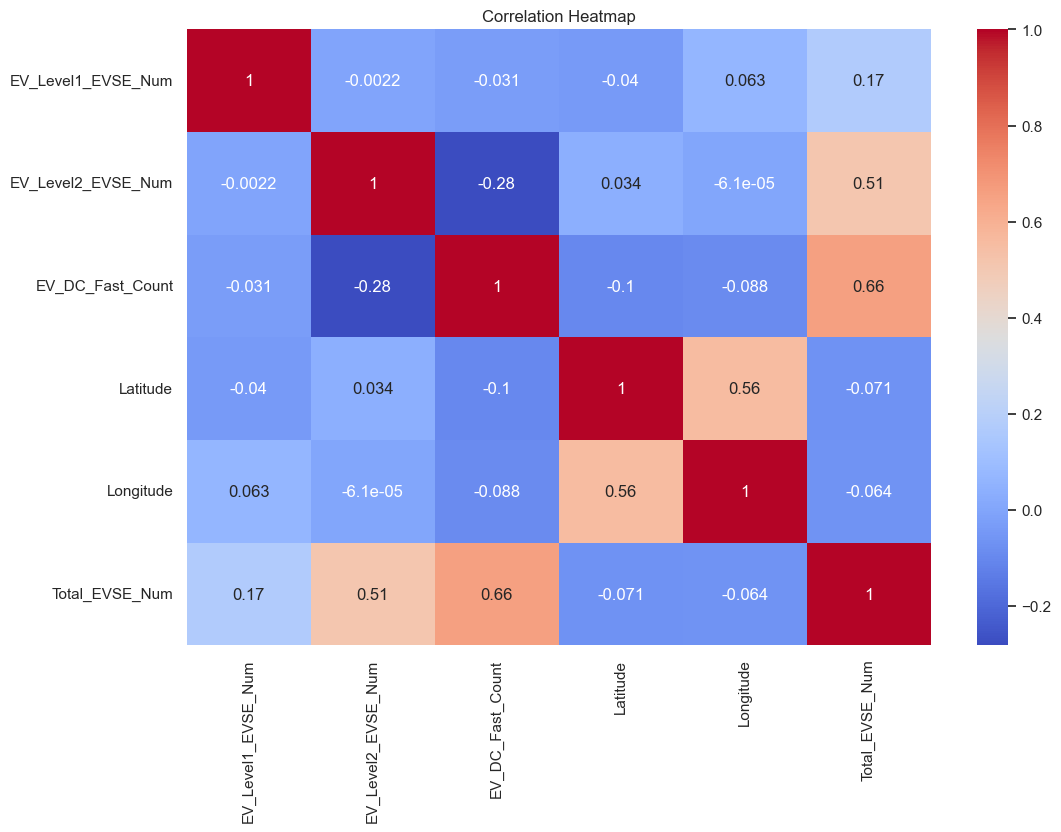

In [118]:
# Heatmap  

numeric_columns = df.select_dtypes(include=['number']).columns
df_numeric= df[numeric_columns] #only the numeric columns are used to calculate the correlations,

import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Correlation heatmap
The heatmap visually represents the correlations between numeric columns in the DataFrame. Each cell in the heatmap shows the correlation coefficient between two variables. The color intensity indicates the strength and direction of the correlation:

Positive correlations are shown in shades of red.
Negative correlations are shown in shades of blue.
Correlations closer to 1 or -1 indicate stronger relationships, while those closer to 0 indicate weaker relationships.

In [119]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [120]:
# 3D plot showing the City, longitude and latitudes along with the station names.
import plotly.express as px

fig = px.scatter_3d(df, x='City', y='Longitude', z='Latitude', color='Station_Name')
fig.update_layout(title='3D Scatter Plot of Charging Stations by City, Longitude, and Latitude')
fig.show()


plt.savefig('3d_plot.png')

<Figure size 640x480 with 0 Axes>

# 3D Plot
this 3D plot shows a visual representation of the geographic distribution of charging stations across different cities.
this can help in understanding relationships and distribution of the charging stations

# Insights
Station Identification: the plot helps in identifying which stations are located in proximity to each other or further away.

In [121]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.distance import geodesic
import numpy as np



# Initialize geolocator
geolocator = Nominatim(user_agent="ev_stations_locator")

# Function to get coordinates from city name
def get_coordinates(city_name):
    location = geolocator.geocode(city_name)
    if location:
        return (location.latitude, location.longitude)
    else:
        raise ValueError(f"Could not geocode city: {city_name}")

# Get coordinates for start and end cities
city_A = "New Fairfield"
city_B = "Fairfield"
Starting_location = get_coordinates(city_A)
Destination = get_coordinates(city_B)

# Function to find nearest charging station
def find_nearest_charging_station(point, stations):
    distances = stations.apply(lambda row: geodesic(point, (row['Latitude'], row['Longitude'])).miles, axis=1)
    nearest_index = distances.idxmin()
    return stations.loc[nearest_index], distances.min()

# Find the nearest charging stations to point A and point B
nearest_station_A, distance_to_A = find_nearest_charging_station(Starting_location, df)
nearest_station_B, distance_to_B = find_nearest_charging_station(Destination, df)

# Define a function to find stations along the route
def find_stations_along_route(Starting_location, Destination, stations, radius=10):
    route_stations = []
    for _, row in stations.iterrows():
        if geodesic(Starting_location, (row['Latitude'], row['Longitude'])).miles <= radius or \
           geodesic(Destination, (row['Latitude'], row['Longitude'])).miles <= radius:
            route_stations.append(row)
    return pd.DataFrame(route_stations)

# Find stations along the route
stations_along_route = find_stations_along_route(Starting_location, Destination, df)

nearest_station_A_info = nearest_station_A[['Station_Name', 'City', 'Latitude', 'Longitude']]
nearest_station_B_info = nearest_station_B[['Station_Name', 'City', 'Latitude', 'Longitude']]

# nearest_station_A_info, distance_to_A, nearest_station_B_info, distance_to_B, stations_along_route
print("stations along route:", city_A , "to", city_B )
print( stations_along_route.to_string())


stations along route: New Fairfield to Fairfield
                               Station_Name         Street_Address           City                                                  Access_Days_Time  EV_Level1_EVSE_Num  EV_Level2_EVSE_Num  EV_DC_Fast_Count EV_Other_Info        New_Georeferenced_Column        Category   Latitude  Longitude  Total_EVSE_Num
59                            LIBRARY KIOSK             24 Main St    New Milford                                                    24 hours daily                   0                   1                 0          NONE    POINT (-73.41116 41.5785572)           Daily  41.578557 -73.411160               1
102                         WHOLE FOODS MKT      5 Sugar Hollow Rd        Danbury                                                    24 hours daily                   0                   1                 0          NONE   POINT (-73.475576 41.3777667)           Daily  41.377767 -73.475576               1
114       Town of New Fairfield -

# Stations along route
after declaring the city start and city destination, the stations along the route are identified along with their addresses. as shown above

In [122]:
# Visualizing stations along routes

import pandas as pd
from geopy.geocoders import Nominatim
from geopy.distance import geodesic
import numpy as np
import plotly.express as px

# Initialize geolocator
geolocator = Nominatim(user_agent="ev_stations_locator")

# Function to get coordinates from city name
def get_coordinates(city_name):
    location = geolocator.geocode(city_name)
    if location:
        return (location.latitude, location.longitude)
    else:
        raise ValueError(f"Could not geocode city: {city_name}")

# Get coordinates for start and end cities
city_A = "New fairfield"
city_B = "Danbury"
Starting_location = get_coordinates(city_A)
Destination = get_coordinates(city_B)

# Function to find nearest charging station
def find_nearest_charging_station(point, stations):
    distances = stations.apply(lambda row: geodesic(point, (row['Latitude'], row['Longitude'])).miles, axis=1)
    nearest_index = distances.idxmin()
    return stations.loc[nearest_index], distances.min()

# Find the nearest charging stations to point A and point B
nearest_station_A, distance_to_A = find_nearest_charging_station(Starting_location, df)
nearest_station_B, distance_to_B = find_nearest_charging_station(Destination, df)

# Define a function to find stations along the route
def find_stations_along_route(Starting_location, Destination, stations, radius=10):
    route_stations = []
    for _, row in stations.iterrows():
        if geodesic(Starting_location, (row['Latitude'], row['Longitude'])).miles <= radius or \
           geodesic(Destination, (row['Latitude'], row['Longitude'])).miles <= radius:
            route_stations.append(row)
    return pd.DataFrame(route_stations)

# Find stations along the route
stations_along_route = find_stations_along_route(Starting_location, Destination, df)

nearest_station_A_info = nearest_station_A[['Station_Name', 'City', 'Latitude', 'Longitude']]
nearest_station_B_info = nearest_station_B[['Station_Name', 'City', 'Latitude', 'Longitude']]

# Prepare data for visualization
data = {
    'name': ['Starting Location', 'Nearest Station A', 'Destination', 'Nearest Station B'] + stations_along_route['Station_Name'].tolist(),
    'Latitude': [Starting_location[0], nearest_station_A['Latitude'], Destination[0], nearest_station_B['Latitude']] + stations_along_route['Latitude'].tolist(),
    'Longitude': [Starting_location[1], nearest_station_A['Longitude'], Destination[1], nearest_station_B['Longitude']] + stations_along_route['Longitude'].tolist(),
    'type': ['Starting Location', 'Nearest Station A', 'Destination', 'Nearest Station B'] + ['Charging Station'] * len(stations_along_route),
    'city': [city_A, nearest_station_A['City'], city_B, nearest_station_B['City']] + stations_along_route['City'].tolist(),
    'street_address': [city_A, nearest_station_A['Street_Address'], city_B, nearest_station_B['Street_Address']] + stations_along_route['Street_Address'].tolist()
}

df_vis = pd.DataFrame(data)

# Create the map plot
fig = px.scatter_mapbox(df_vis, lat='Latitude', lon='Longitude', text='name', color='type',
                        hover_data=['city', 'street_address'], mapbox_style='carto-positron', zoom=8, height=600)

# Add lines to connect the points
fig.add_trace(px.line_mapbox(df_vis, lat='Latitude', lon='Longitude').data[0])

# Adjust layout for clarity
fig.update_layout(
    title="Charging Stations Along the Route from Starting Location to Destination",
    margin={"r":0,"t":0,"l":0,"b":0},
    showlegend=True
)

fig.show()

# Stations along routes Visualization
the stations along routes are visualized using a map and the starting point and destinations are also shown.

In [123]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.distance import geodesic
import plotly.express as px

# Initialize geolocator
geolocator = Nominatim(user_agent="ev_stations_locator")

# Function to get coordinates from city name
def get_coordinates(city_name):
    location = geolocator.geocode(city_name)
    if location:
        return (location.latitude, location.longitude)
    else:
        raise ValueError(f"Could not geocode city: {city_name}")

# Function to find the nearest charging station
def find_nearest_charging_station(point, stations):
    distances = stations.apply(lambda row: geodesic((row['Latitude'], row['Longitude']), point).kilometers, axis=1)
    nearest_index = distances.idxmin()
    return stations.loc[nearest_index], distances.min()

# Function to find stations along the route
def find_stations_along_route(start, end, stations, radius=10):
    route_stations = []
    for _, row in stations.iterrows():
        if geodesic(start, (row['Latitude'], row['Longitude'])).kilometers <= radius or \
           geodesic(end, (row['Latitude'], row['Longitude'])).kilometers <= radius:
            route_stations.append(row)
    return pd.DataFrame(route_stations)

# Get coordinates for start and end cities
city_Start = "New Fairfield" # city start  A 
city_End = "Danbury" # city start B / Destination
Starting_location = get_coordinates(city_A)
Destination = get_coordinates(city_B)

# distance_to_A is Distance from each charging station to the starting location (City Start).
# distance_to_B: Distance from each charging station to the destination (City B).

# Pre-calculate distances from each station to starting and ending points
df['distance_to_A'] = df.apply(lambda row: geodesic((row['Latitude'], row['Longitude']), Starting_location).kilometers, axis=1)
df['distance_to_B'] = df.apply(lambda row: geodesic((row['Latitude'], row['Longitude']), Destination).kilometers, axis=1)

# Find the nearest charging stations to point A and point B
nearest_station_A, distance_to_A = find_nearest_charging_station(Starting_location, df)
nearest_station_B, distance_to_B = find_nearest_charging_station(Destination, df)

# Find stations along the route
stations_along_route = find_stations_along_route(Starting_location, Destination, df)

# Prepare data for visualization
data = {
    'name': ['Starting Location', 'Nearest Station A', 'Destination', 'Nearest Station B'] + stations_along_route['Station_Name'].tolist(),
    'latitude': [Starting_location[0], nearest_station_A['Latitude'], Destination[0], nearest_station_B['Latitude']] + stations_along_route['Latitude'].tolist(),
    'longitude': [Starting_location[1], nearest_station_A['Longitude'], Destination[1], nearest_station_B['Longitude']] + stations_along_route['Longitude'].tolist(),
    'type': ['Starting Location', 'Nearest Station A', 'Destination', 'Nearest Station B'] + ['Charging Station'] * len(stations_along_route),
    'city': [city_Start, nearest_station_A['City'], city_End, nearest_station_B['City']] + stations_along_route['City'].tolist(),
    'street_address': [city_Start, nearest_station_A['Street_Address'], city_End, nearest_station_B['Street_Address']] + stations_along_route['Street_Address'].tolist(),
    'distance_to_A': [None] + [distance_to_A] + [None] + [None] + stations_along_route['distance_to_A'].tolist(),
    'distance_to_B': [None] + [None] + [None] + [distance_to_B] + stations_along_route['distance_to_B'].tolist()
}

df_vis = pd.DataFrame(data)

# Check if the DataFrame has been prepared correctly
print(df_vis.to_string())

# Create the map plot
fig = px.scatter_mapbox(df_vis, lat='latitude', lon='longitude', text='name', color='type',
                        hover_data={'name': True, 'city': True, 'street_address': True,
                                    'distance_to_A': True, 'distance_to_B': True},
                        mapbox_style='carto-positron', zoom=8, height=600)


fig.add_trace(px.line_mapbox(df_vis, lat='latitude', lon='longitude',  text='street_address').data[0])


fig.update_layout(
    title="Charging Stations Along the Route from Starting Location to Destination",
    margin={"r":0,"t":0,"l":0,"b":0},
    showlegend=True
)

fig.show()


                                      name   latitude  longitude               type           city         street_address  distance_to_A  distance_to_B
0                        Starting Location  41.466483 -73.485679  Starting Location  New Fairfield          New Fairfield            NaN            NaN
1                        Nearest Station A  41.465514 -73.487032  Nearest Station A  New Fairfield        4 Brush Hill Rd       0.156091            NaN
2                              Destination  41.394817 -73.454011        Destination        Danbury                Danbury            NaN            NaN
3                        Nearest Station B  41.396042 -73.451059  Nearest Station B        Danbury            21 Delay St            NaN       0.281890
4                          WHOLE FOODS MKT  41.377767 -73.475576   Charging Station        Danbury      5 Sugar Hollow Rd       9.889169       2.615203
5        Town of New Fairfield - Town Hall  41.465514 -73.487032   Charging Station  New

# Distances between start and destination
visualizations of the routes and stations along the routes.

distance_to_A is Distance from each charging station to the starting location (City Start).
distance_to_B: Distance from each charging station to the destination (City B).

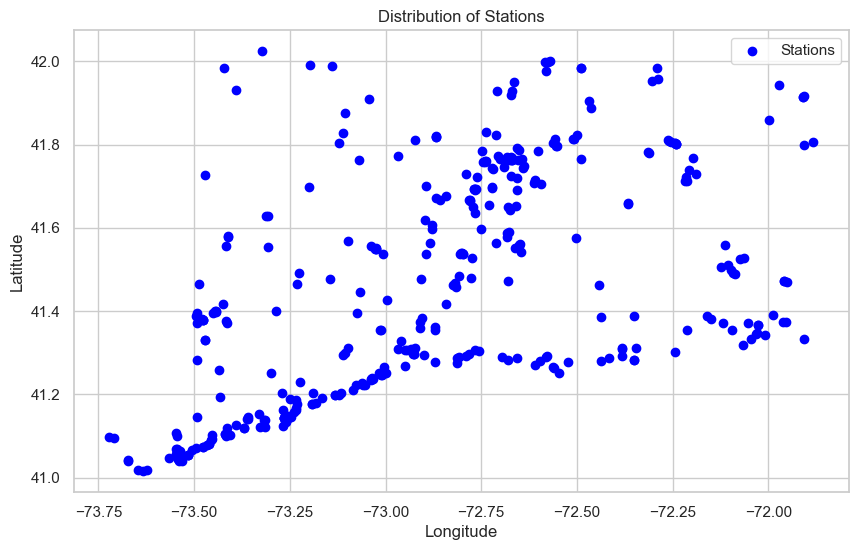

In [124]:

import pandas as pd
import matplotlib.pyplot as plt
from shapely import wkt

# Convert the New_Georeferenced_Column to latitude and longitude
df['geometry'] = df['New_Georeferenced_Column'].apply(wkt.loads)
df['Latitude'] = df['geometry'].apply(lambda geom: geom.y)
df['Longitude'] = df['geometry'].apply(lambda geom: geom.x)



# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], c='blue', marker='o', label='Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribution of Stations')
plt.legend()
plt.grid(True)
plt.show()

In [125]:

import numpy as np

# Calculate the bounding box
min_lat, max_lat = df['Latitude'].min(), df['Latitude'].max()
min_lon, max_lon = df['Longitude'].min(), df['Longitude'].max()

# Function to calculate the distance between two lat/lon points in miles
def haversine(lon1, lat1, lon2, lat2):
    R = 3958.8  # Earth radius in miles
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

# Calculate the width and height of the bounding box in miles
width = haversine(min_lon, min_lat, max_lon, min_lat)
height = haversine(min_lon, min_lat, min_lon, max_lat)

# Calculate the total area in square miles
total_area_sq_miles = width * height

# Count the number of stations
num_stations = len(df)

# Calculate the density of stations per square mile
density_stations_per_sq_mile = num_stations / total_area_sq_miles

# Print the results
print(f'Total area: {total_area_sq_miles:.2f} square miles')
print(f'Number of stations: {num_stations}')
print(f'Density of stations: {density_stations_per_sq_mile:.2f} stations per square mile')

Total area: 6689.14 square miles
Number of stations: 385
Density of stations: 0.06 stations per square mile


In [126]:
df.head()

,Station_Name,Street_Address,City,Access_Days_Time,EV_Level1_EVSE_Num,EV_Level2_EVSE_Num,EV_DC_Fast_Count,EV_Other_Info,New_Georeferenced_Column,Category,Latitude,Longitude,Total_EVSE_Num,distance_to_A,distance_to_B,geometry
0,BMW OF DARIEN,138-142 Ledge Rd,Darien,24 hours daily,0,2,0,NONE,POINT (-73.4764687 41.072882),Daily,41.072882,-73.476469,2,43.719817,35.803135,POINT (-73.4764687 41.072882)
1,Dunkin’ - Tesla Supercharger,893 E Main St,Meriden,24 hours daily; for tesla use only,0,0,8,NONE,POINT (-72.773473 41.527367),Tesla,41.527367,-72.773473,8,59.852302,58.731071,POINT (-72.773473 41.527367)
2,Town of Beacon Falls - Commuter Lot,105 N Main St,Beacon Falls,24 hours daily,0,1,0,NONE,POINT (-73.065583 41.44548100000001),Daily,41.445481,-73.065583,1,35.177523,32.955947,POINT (-73.065583 41.44548100000001)
3,OLD SAYBROOK VW,319 Middlesex Turnpike,Old Saybrook,24 hours daily,0,2,0,NONE,POINT (-72.3825 41.3102778),Daily,41.310278,-72.382500,2,93.885243,90.159320,POINT (-72.3825 41.3102778)
4,Fairfield Rail Station,80 Mill Plain Rd,Fairfield,24 hours daily,0,2,0,NONE,POINT (-73.264511 41.143125),Daily,41.143125,-73.264511,2,40.407186,32.147822,POINT (-73.264511 41.143125)


In [127]:

#Availability and Count of Charging Levels
# count occurrences of each EV level
level1_count = df[df['EV_Level1_EVSE_Num'] != 0].shape[0]
level2_count = df[df['EV_Level2_EVSE_Num'] != 0].shape[0]
dc_fast_count = df[df['EV_DC_Fast_Count'] != 0].shape[0]

# Print the counts
print(f'EV Level 1 Count: {level1_count}')
print(f'EV Level 2 Count: {level2_count}')
print(f'EV DC Fast Count: {dc_fast_count}')

EV Level 1 Count: 9
EV Level 2 Count: 341
EV DC Fast Count: 54


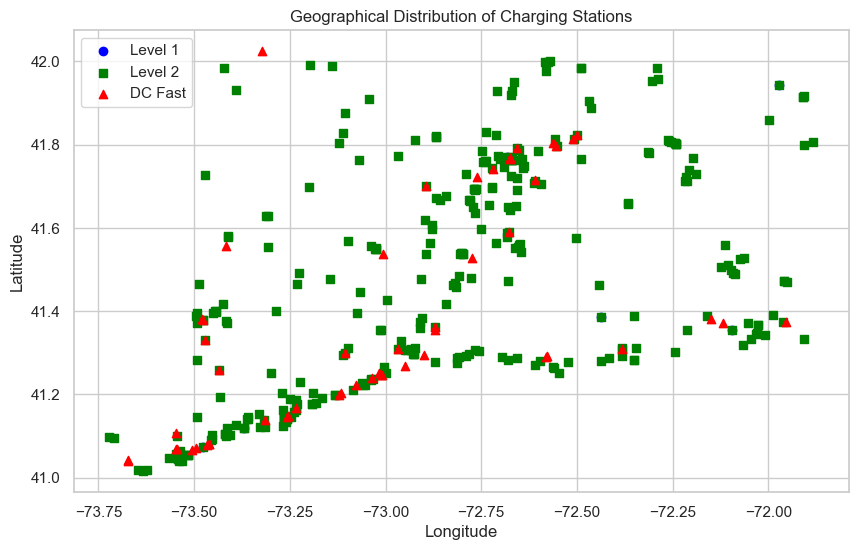

In [128]:
# Convert the New_Georeferenced_Column to latitude and longitude
df['geometry'] = df['New_Georeferenced_Column'].apply(wkt.loads)
df['Latitude'] = df['geometry'].apply(lambda geom: geom.y)
df['Longitude'] = df['geometry'].apply(lambda geom: geom.x)

# Create separate DataFrames for each type of charging level
df_level1 = df[df['EV_Level1_EVSE_Num'] != 0]
df_level2 = df[df['EV_Level2_EVSE_Num'] != 0]
df_dc_fast = df[df['EV_DC_Fast_Count'] != 0]

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(df_level1['Longitude'], df_level1['Latitude'], c='blue', marker='o', label='Level 1')
plt.scatter(df_level2['Longitude'], df_level2['Latitude'], c='green', marker='s', label='Level 2')
plt.scatter(df_dc_fast['Longitude'], df_dc_fast['Latitude'], c='red', marker='^', label='DC Fast')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Charging Stations')
plt.legend()
plt.grid(True)
plt.show()

In [129]:
#Findind the number of stations with in different cities
city_counts = df['City'].value_counts()

# Print the city and their counts
print(city_counts.to_string())

City
Stamford              21
Hartford              20
Fairfield             20
New Haven             13
Danbury               12
Milford               11
Westport              10
Middletown             9
New Britain            9
Norwalk                8
Greenwich              8
Darien                 8
West Hartford          8
Groton                 8
Madison                7
Meriden                6
Waterbury              6
Old Saybrook           6
Branford               6
Manchester             6
East Hartford          5
Norwich                5
Wallingford            5
Storrs                 5
Bridgeport             5
Mansfield              4
Enfield                4
Stratford              4
Glastonbury            4
Hamden                 3
Southington            3
Plainville             3
Orange                 3
Ridgefield             3
Putnam                 3
Stafford Springs       3
Wethersfield           3
New Milford            3
Newington              3
Mystic              

count
1-3 stations     90
4-7 stations     15
7-11 stations     9
12+ stations      5
Name: count, dtype: int64


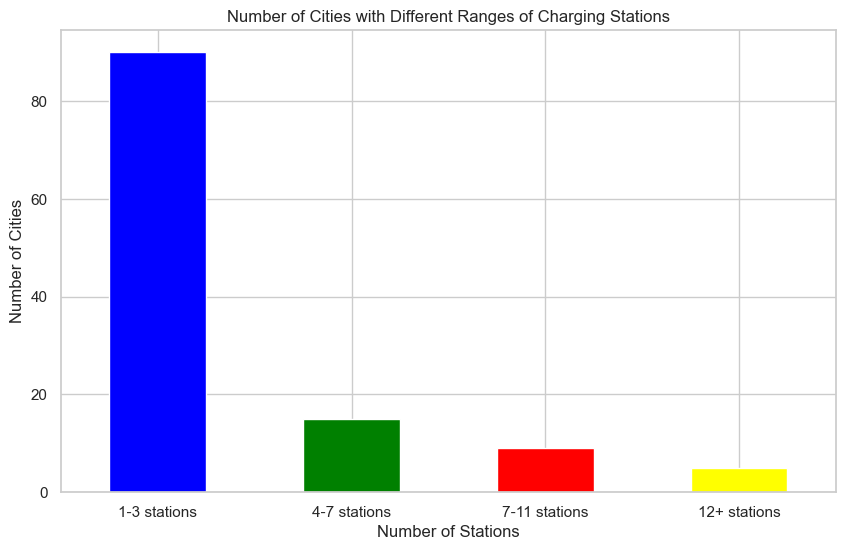

In [130]:
# Converting  the dictionary to a DataFrame
city_counts = pd.Series(city_counts)

# Define bins for the ranges
bins = [0, 3, 7, 11, city_counts.max()]
labels = ['1-3 stations', '4-7 stations', '7-11 stations','12+ stations']

# Cut the city counts into the specified bins
city_bins = pd.cut(city_counts, bins=bins, labels=labels, right=True)

# Count the number of cities in each bin
bin_counts = city_bins.value_counts().sort_index()

# Print the bin counts
print(bin_counts)

# Plot the data
plt.figure(figsize=(10, 6))
bin_counts.plot(kind='bar', color=['blue', 'green', 'red', 'yellow'])
plt.xlabel('Number of Stations')
plt.ylabel('Number of Cities')
plt.title('Number of Cities with Different Ranges of Charging Stations')
plt.xticks(rotation=0)
plt.show()

                   City  Count
0              Stamford     21
1              Hartford     20
2             Fairfield     20
3             New Haven     13
4               Danbury     12
5               Milford     11
6              Westport     10
7            Middletown      9
8           New Britain      9
9               Norwalk      8
10            Greenwich      8
11               Darien      8
12        West Hartford      8
13               Groton      8
14              Madison      7
15              Meriden      6
16            Waterbury      6
17         Old Saybrook      6
18             Branford      6
19           Manchester      6
20        East Hartford      5
21              Norwich      5
22          Wallingford      5
23               Storrs      5
24           Bridgeport      5
25            Mansfield      4
26              Enfield      4
27            Stratford      4
28          Glastonbury      4
29               Hamden      3
30          Southington      3
31      

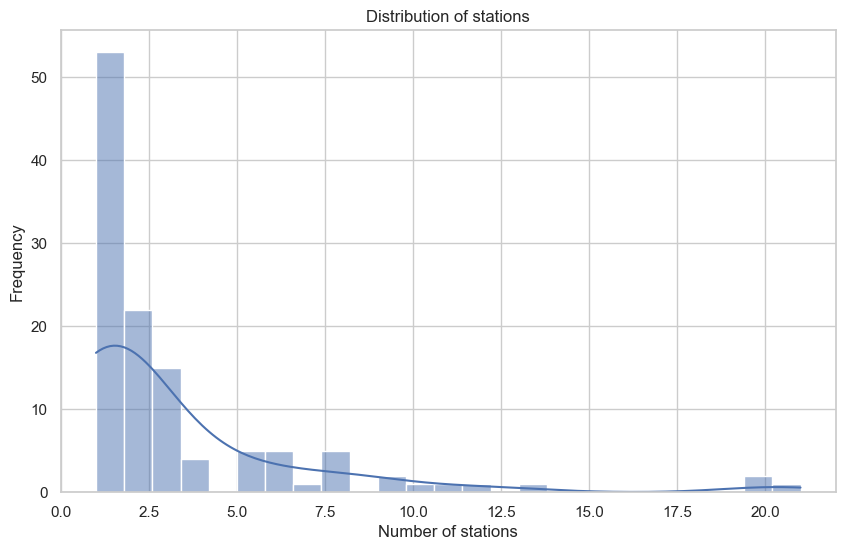

In [131]:
import seaborn as sns

# Convert the Series to a DataFrame for easier handling
data = city_counts.reset_index()
data.columns = ['City', 'Count']

print(data.to_string())

# Visualize the distribution

plt.figure(figsize=(10, 6))
sns.histplot(data['Count'].dropna(), kde=True)
plt.title('Distribution of stations')
plt.xlabel('Number of stations')
plt.ylabel('Frequency')
plt.show()

      Station_Category  Count
0         Level 2 only    322
1         DC Fast only     42
2  Level 2 and DC Fast     12
3        Level 1 and 2      7
4         Level 1 only      2


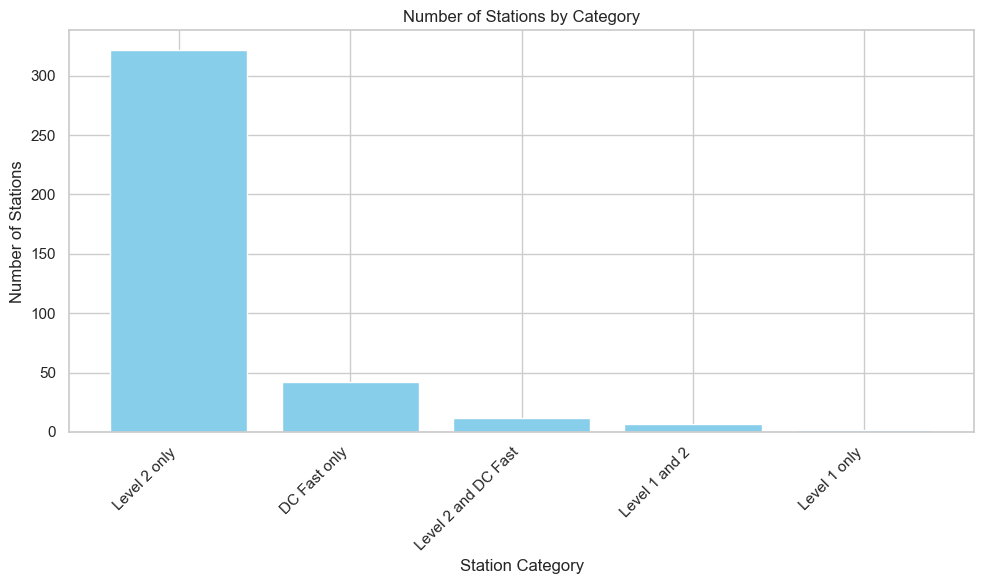

In [132]:
# Create a new column to categorize the stations
def categorize_station(row):
    level1 = row['EV_Level1_EVSE_Num'] > 0
    level2 = row['EV_Level2_EVSE_Num'] > 0
    dc_fast = row['EV_DC_Fast_Count'] > 0
    
    if level1 and not level2 and not dc_fast:
        return 'Level 1 only'
    elif not level1 and level2 and not dc_fast:
        return 'Level 2 only'
    elif not level1 and not level2 and dc_fast:
        return 'DC Fast only'
    elif level1 and level2 and not dc_fast:
        return 'Level 1 and 2'
    elif level1 and not level2 and dc_fast:
        return 'Level 1 and DC Fast'
    elif not level1 and level2 and dc_fast:
        return 'Level 2 and DC Fast'
    elif level1 and level2 and dc_fast:
        return 'Level 1, 2, and DC Fast'
    else:
        return 'Other'

df['Station_Category'] = df.apply(categorize_station, axis=1)

# Count the number of stations in each category
category_counts = df['Station_Category'].value_counts().reset_index()
category_counts.columns = ['Station_Category', 'Count']

print(category_counts)

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(category_counts['Station_Category'], category_counts['Count'], color='skyblue')
plt.title('Number of Stations by Category')
plt.xlabel('Station Category')
plt.ylabel('Number of Stations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


->The vast majority of the stations fall under the "Level 2 only" category, indicating that Level 2 chargers are the most common type of EV charger available.
->A smaller number of stations provide "DC Fast only" chargers. This indicates that while DC Fast chargers are available, they are not as prevalent as Level 2 chargers.
->There are even fewer stations that offer both "Level 2 and DC Fast" chargers. This suggests that combined charging options are less common
->Stations that provide both "Level 1 and 2" chargers are minimal. This could be because Level 1 chargers are generally slower and less preferred by users compared to Level 2 chargers.

NB: There is no Station that provides the all three types of chargers in the State



# Actionable Insights
Increase DC Fast Chargers: With the rising number of EVs and the demand for faster charging options, increasing the number of DC Fast chargers could enhance user convenience and attract more EV users.




__EV Charge stations against EV charge spot/branch levels__

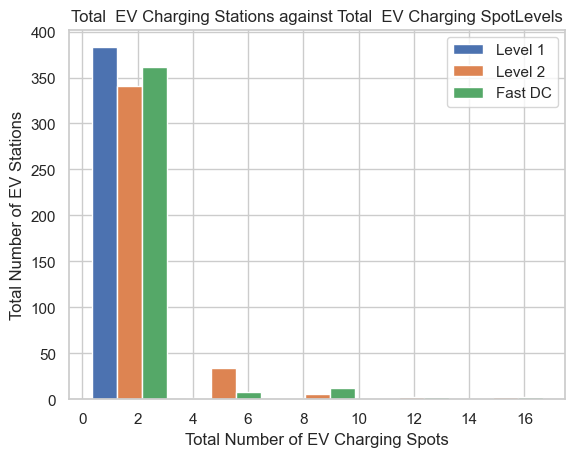

In [133]:

plt.hist([df['EV_Level1_EVSE_Num'],df['EV_Level2_EVSE_Num'],df['EV_DC_Fast_Count']], bins=5, alpha=1, label=['Level 1', 'Level 2', 'Fast DC'])
plt.xlabel('Total Number of EV Charging Spots')
plt.ylabel('Total Number of EV Stations')
plt.legend()
plt.title('Total  EV Charging Stations against Total  EV Charging SpotLevels')
plt.show()


**Total EV charge distribution Graph.**

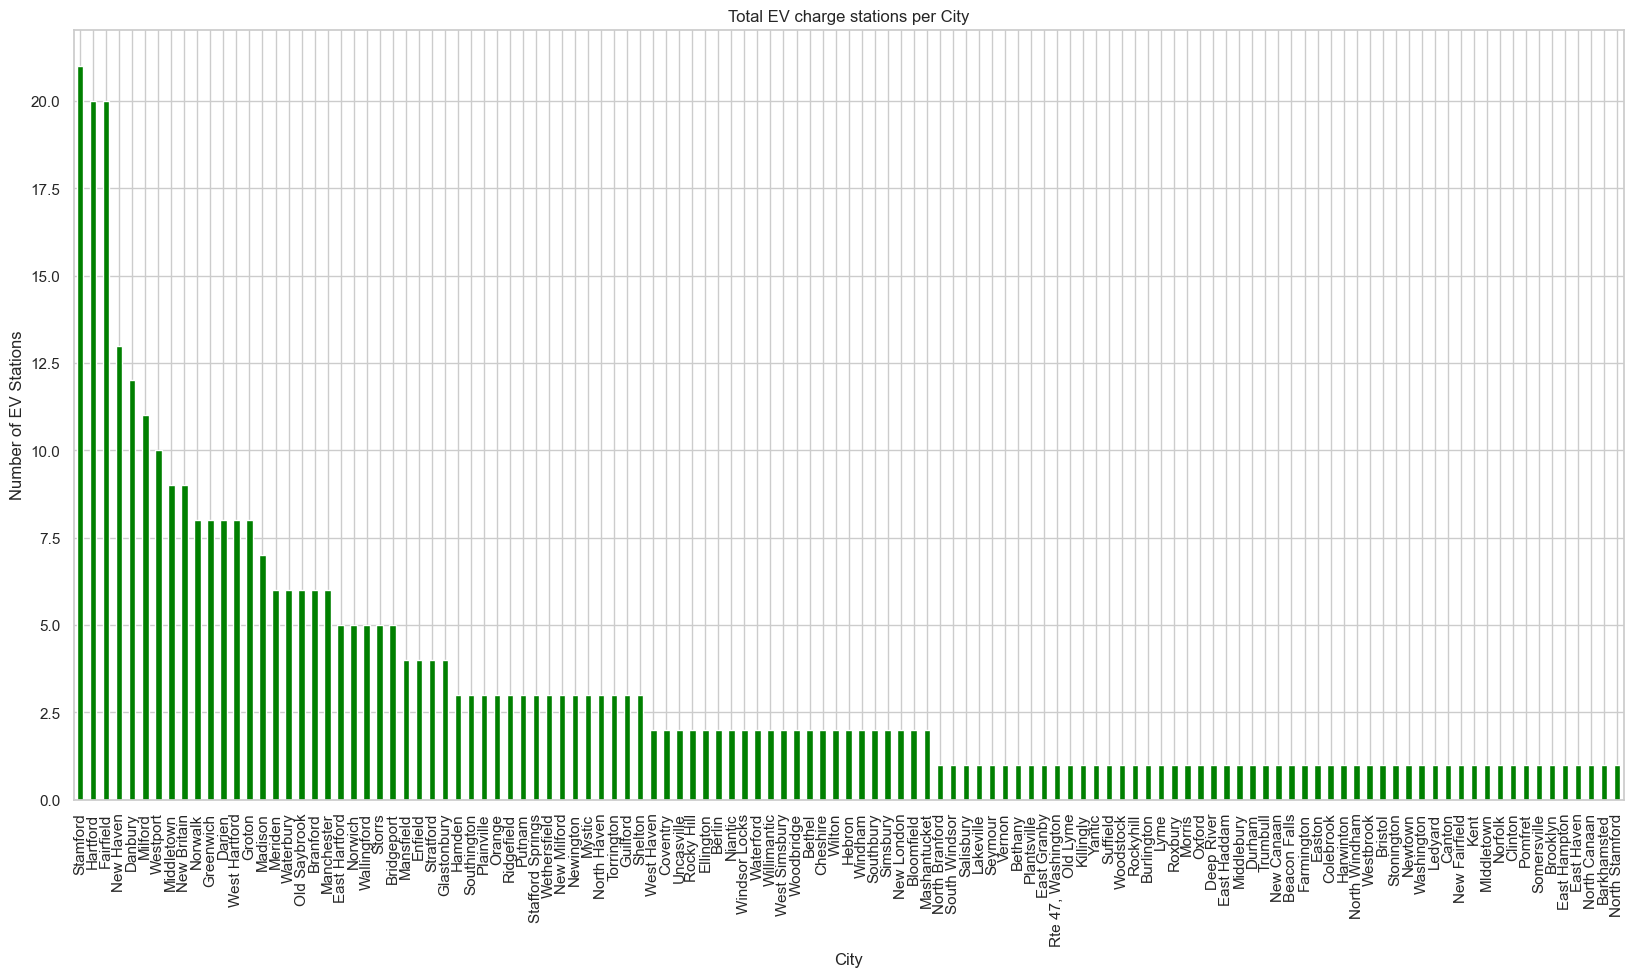

In [134]:
# getting the total number of EV charging stations per city
df['City'].value_counts().plot(kind='bar',color="green", figsize=(20,10))
plt.xlabel('City')
plt.ylabel('Number of EV Stations')
plt.title('Total EV charge stations per City')
plt.show()

    Total_EV_Count                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

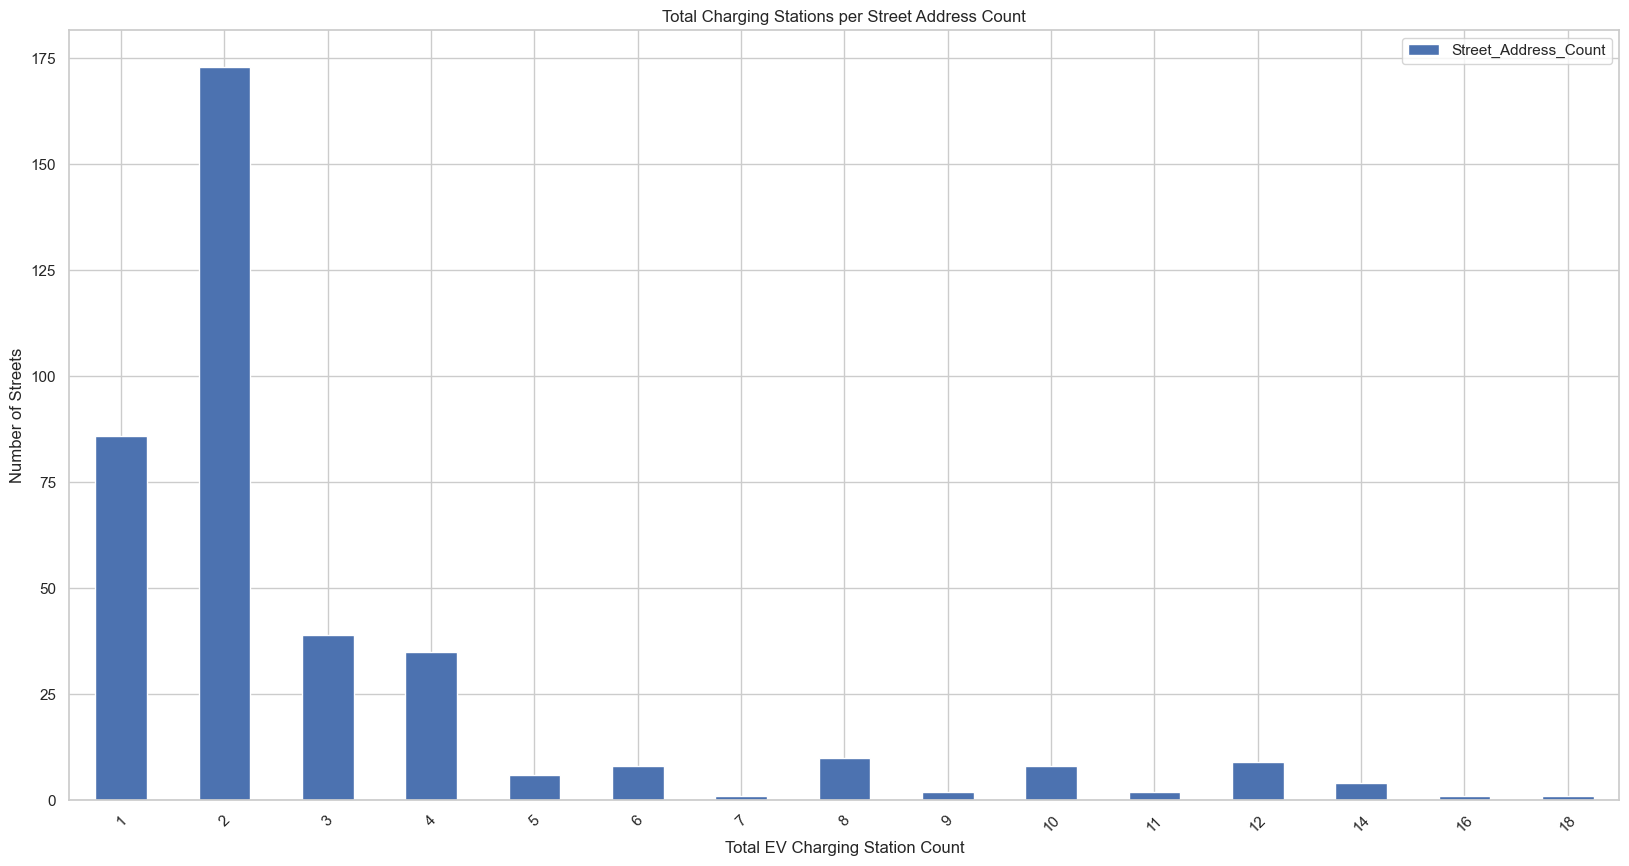

In [135]:

# Step 1: Create a mapping from street addresses to unique numbers
address_to_number = {address: i for i, address in enumerate(df['Street_Address'].unique())}

# Map the street addresses in the DataFrame to these numbers
df['Address_Number'] = df['Street_Address'].map(address_to_number)

# test the mapping
# print(df[['Address_Number','Street Address']].to_string())

# Group by 'Address_Number' and sum the values for each level
grouped_data = df.groupby('Address_Number')[['EV_Level1_EVSE_Num', 'EV_Level2_EVSE_Num', 'EV_DC_Fast_Count']].sum()

# Add a new column 'Total_EV_Count' that is the sum of all three levels for each 'Address_Number'
grouped_data['Total_EV_Count'] = grouped_data.sum(axis=1)


# Merge the original DataFrame with the grouped data to associate 'Address_Number' with 'Total_EV_Count'
df_merged = df.merge(grouped_data['Total_EV_Count'], left_on='Address_Number', right_index=True)

# Now, group by 'Total_EV_Count' to aggregate cities (or street addresses) with the same total count
cities_grouped_by_ev_count = df_merged.groupby('Total_EV_Count')['Street_Address'].apply(list).reset_index()

# This gives you a DataFrame where each 'Total_EV_Count' is associated with a list of cities having that count
print(cities_grouped_by_ev_count.to_string())

print(cities_grouped_by_ev_count.sum())

# Count the number of cities for each 'Total_EV_Count'
cities_grouped_by_ev_count['Street_Address_Count'] = cities_grouped_by_ev_count['Street_Address'].apply(len)

# Plotting
cities_grouped_by_ev_count.plot(x='Total_EV_Count', y='Street_Address_Count', kind='bar', figsize=(20,10), xlabel='Total EV Charging Station Count', ylabel='Number of Streets')

plt.title('Total Charging Stations per Street Address Count')


plt.xticks(rotation=45) 
plt.show()




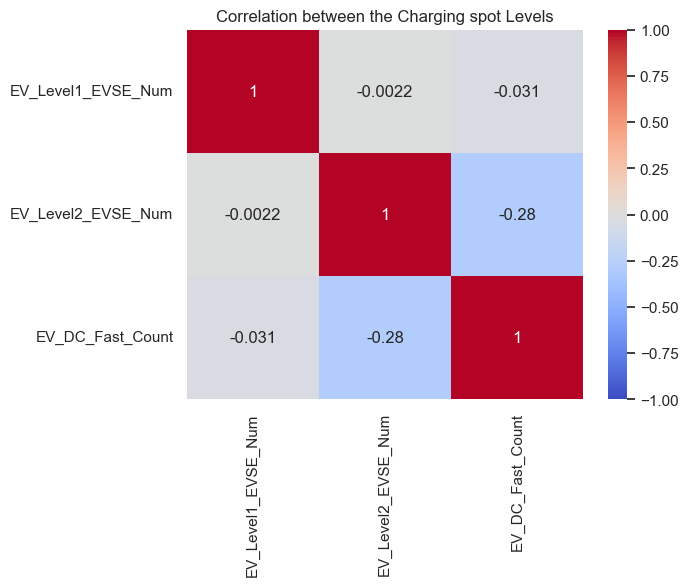

In [136]:
# correlation between the different Charging spot levels
x = df[['EV_Level1_EVSE_Num','EV_Level2_EVSE_Num','EV_DC_Fast_Count']]
sns.heatmap(x.corr(), annot=True, cmap='coolwarm',vmax=1,vmin=-1)
plt.title('Correlation between the Charging spot Levels')
plt.show()


# Modal Accuracy checking and analysis

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import  LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.model_selection import KFold,cross_val_score 


# Split the data into features and target
X = df[['EV_Level1_EVSE_Num','EV_Level2_EVSE_Num']]
y = df['EV_DC_Fast_Count']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy of the RandomForest model',accuracy_score(y_test, y_pred))
print('Mean squared error of the RandomForest model',mean_squared_error(y_test, y_pred))

Accuracy of the RandomForest model 0.8441558441558441
Mean squared error of the RandomForest model 6.805194805194805


In [138]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy of the Linear Regression model',model.score(X_test, y_test))
print('Mean Squared Error of the Linear Regression model',mean_squared_error(y_test, y_pred))

Accuracy of the Linear Regression model 0.059987345621223875
Mean Squared Error of the Linear Regression model 7.11327504661126


In [139]:
# model = KFold(n_splits=5, shuffle=True, random_state=42)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy of the Decision Tree model',accuracy_score(y_test, y_pred))
print('Mean squared error of the Decision Tree model',mean_squared_error(y_test, y_pred))

Accuracy of the Decision Tree model 0.8441558441558441
Mean squared error of the Decision Tree model 6.805194805194805


In [140]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy of the KNN model',accuracy_score(y_test, y_pred))
print('Mean squared error of the KNN model',mean_squared_error(y_test, y_pred))


Accuracy of the KNN model 0.8441558441558441
Mean squared error of the KNN model 6.805194805194805


In [141]:
# cross validation with stratified kfold
from sklearn.model_selection  import StratifiedKFold
StratifiedKFold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
scores = cross_val_score(model, X, y, cv=StratifiedKFold)
print('Accuracy of the Random Forest model',scores.mean())

c:\Users\HP PROBOOK\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



Accuracy of the Random Forest model 0.890909090909091


In [142]:
# cross validation with kfold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
scores = cross_val_score(model, X, y, cv=kfold)
print('Accuracy of the Random Forest model',scores.mean())

Accuracy of the Random Forest model 0.8883116883116884


__Observations From above:__\
The accuracy score of Kfold is lower than that of StrtifiedKFold. Making the stratifiedKfold the best choice for the crossvalidation of the dataset \
__Reason__\
There is an imbalance in the distribution of our traget classes in the data set (Fast DC)

Also when we try to observe the Mean squared errors and the accuracy of KNeighbours,DecisionTree and RandomForest are equal except for the Linear Regression model whose acurracy is lower than the other models with its mean squared error a bit higher
